## Online Payment Fraud Detection Project
 

* This project involves analyzing a bank's dataset using supervised machine learning algorithms. There are 1048575 rows, 10 columns, and no missing values. To understand the dataset and gain some important insights, exploratory data analysis was performed.
The goal of this project is to develop two different models that can predict online payment fraud.
Finally, the model was evaluated using the accuracy, precision, recall.

In [1]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Load Dataset

In [2]:
data = pd.read_csv('Online Payment Fraud Detection.csv')
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [4]:
print(f'shape of the dataframe is {data.shape}')

shape of the dataframe is (1048575, 10)


## Data Description
- This dataset contains categorical and numerical data. It has 1048575 rows, 10 columns and no missing values.
- The columns are called features and column isFraud is the target as it predicts online payment fraud.

In [5]:
#inspect the data
# Checking for unique values in the data
data.nunique()

step                   95
type                    5
amount            1009606
nameOrig          1048317
oldbalanceOrg      391033
newbalanceOrig     440792
nameDest           449635
oldbalanceDest     590110
newbalanceDest     437054
isFraud                 2
dtype: int64

In [6]:
#Checking the information of the data frame to determine the types of data set and also to know if the columns contain null values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [7]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [8]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


In [9]:
# Checking the total count of fraudulent and non-fraudulent transactions
data['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

### Observation
- The value count of the target variable 'isFraud' shows an imbalanced dataset as more than 90% of data points are
in a particular category. This dataset cannot be clearly used for our machine learning model and hence needs to be processed.

In [10]:
# Separating the dataset for analysis
non_fraud = data[data.isFraud == 0]
fraud = data[data.isFraud == 1]
print(non_fraud.shape)
print(fraud.shape)

(1047433, 10)
(1142, 10)


In [11]:
# Checking the value counts of the type of transaction mentioned in the dataset
data['type'].value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

### Observation 
- Separating the dataset on the 'isFraud' column has shown we have 1,047,433 non fraudulent transactions and
1,142 fraudulent transactionn


In [12]:
# Checking the statistical amount of money transacted on non_fraudulent and fraudulent transactions

In [13]:
non_fraud.amount.describe()

count    1.047433e+06
mean     1.575397e+05
std      2.541883e+05
min      1.000000e-01
25%      1.213487e+04
50%      7.621497e+04
75%      2.134928e+05
max      6.419835e+06
Name: amount, dtype: float64

In [14]:
fraud.amount.describe()

count    1.142000e+03
mean     1.192629e+06
std      2.030599e+06
min      1.190000e+02
25%      8.607017e+04
50%      3.531794e+05
75%      1.248759e+06
max      1.000000e+07
Name: amount, dtype: float64

In [15]:
# Dropping columns that are not relevant
data = data.drop(['nameOrig', 'nameDest'], axis=1)
data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


## Exploratory Data Analysis

In [16]:
sns.set()

([<matplotlib.axis.XTick at 0x54a230ffa0>,
 [Text(0, 0, 'Fraud'), Text(1, 0, 'Legit')])

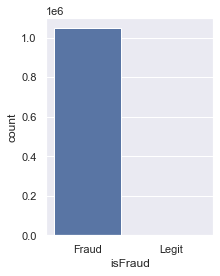

In [17]:
#univariate analysis
plt.figure(figsize=(3,4))
sns.countplot(x='isFraud', data=data)
plt.xticks(range(2), ['Fraud', 'Legit'])

## Observation
- it is obvious from this countplot, that the target column "isFraud" is highly imbalanced. 

<AxesSubplot:xlabel='type', ylabel='count'>

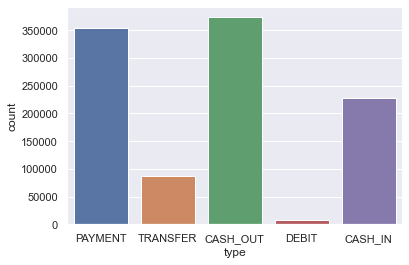

In [18]:
sns.countplot(x='type', data=data)

<AxesSubplot:xlabel='type', ylabel='amount'>

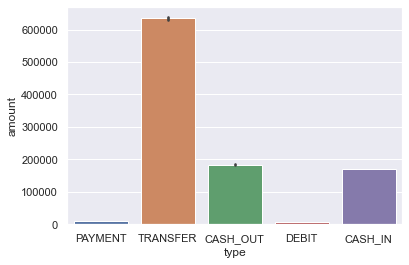

In [19]:
sns.barplot(x='type', y='amount', data=data)

## Observation
- The chart clearly shows most transactional amounts were done through transfer. 

<AxesSubplot:xlabel='isFraud', ylabel='amount'>

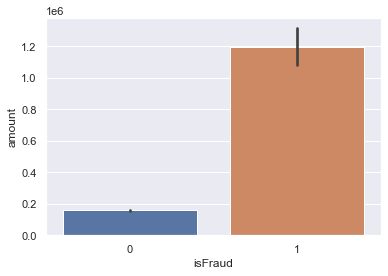

In [20]:
sns.barplot(x='isFraud', y='amount', data=data)

<AxesSubplot:>

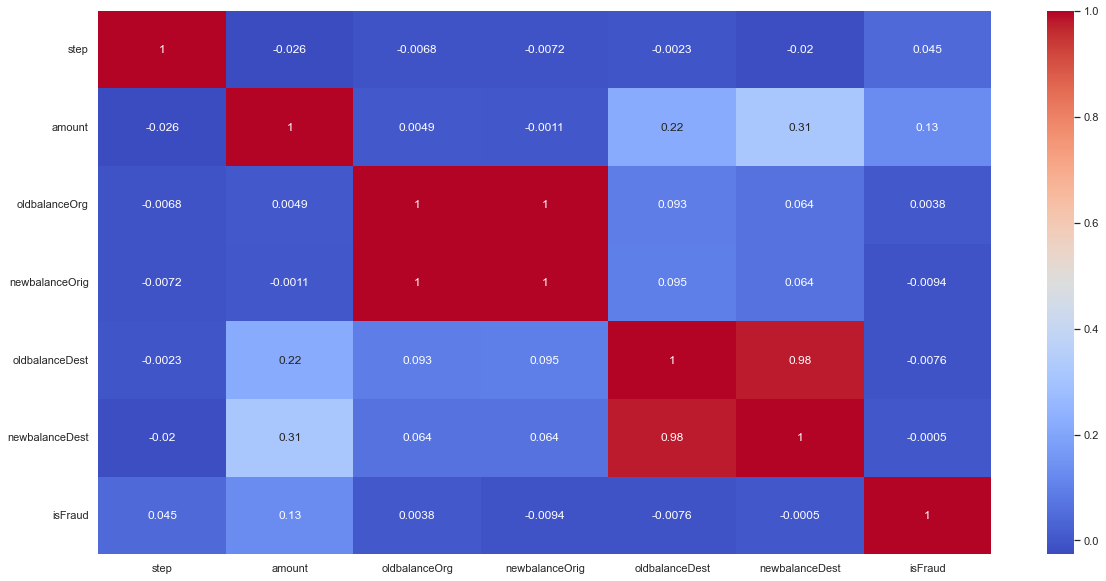

In [21]:
#Multivariate Analysis - Correlation matrix
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

## One Hot Encoding

In [22]:
# Carrying out one-hot encoding to convert categorical data to numerical.
categorical = ['type']

In [23]:
categories_dummies = pd.get_dummies(data[categorical])
categories_dummies.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [24]:
#To join encoded variables to the original dataframe
data = pd.concat([categories_dummies,data], axis=1)
print(data.shape)
data.head()

(1048575, 13)


,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,0,0,0,1,0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,0,0,0,1,0,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,0,0,0,0,1,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,0,1,0,0,0,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,0,0,0,1,0,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [25]:
data = data.drop(categorical,axis=1)
data.head()

,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,0,0,0,1,0,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,0,0,0,1,0,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,0,0,0,0,1,1,181.00,181.0,0.00,0.0,0.0,1
3,0,1,0,0,0,1,181.00,181.0,0.00,21182.0,0.0,1
4,0,0,0,1,0,1,11668.14,41554.0,29885.86,0.0,0.0,0


## Select Target


In [26]:
y = data.isFraud

## Select Features

In [27]:
X = data.drop('isFraud', axis=1)

## Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# Splitting the dataset to a ratio of 80-20 using train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:
print('shape of training feature:', X_train.shape)
print('shape of testing feature:', X_test.shape)
print('shape of training target:', y_train.shape)
print('shape of testing target:', y_train.shape)

shape of training feature: (838860, 11)
shape of testing feature: (209715, 11)
shape of training target: (838860,)
shape of testing target: (838860,)


## Standard Scaling

In [31]:
from sklearn.preprocessing import StandardScaler
sc_train = StandardScaler()
sc_tr = sc_train.fit_transform(X_train)

In [32]:
from sklearn.preprocessing import StandardScaler
sc_test = StandardScaler()
sc_t = sc_test.fit_transform(X_test)

## Importing ML algorithms and initializing them
- In this project, I'll develop a Logistics Regression and Random Forest classifiers and see which one works best. 

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [34]:
LR = LogisticRegression()

In [35]:
RF = RandomForestClassifier()

## Training and Testing the models

## Logistic Regression Algorithm

In [36]:
LR = LogisticRegression(random_state=0)
LR.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [37]:
LR_pred = LR.predict(X_test)

In [38]:
print(f'Accuracy Score = {accuracy_score(y_test,LR_pred)}')
print(f'Precision Score = {precision_score(y_test,LR_pred)}')
print(f'Recall Score is = {recall_score(y_test,LR_pred)}')
print(f'Confusion Matrix is = {confusion_matrix(y_test,LR_pred)}')

Accuracy Score = 0.9990177145173211
Precision Score = 0.5539568345323741
Recall Score is = 0.34841628959276016
Confusion Matrix is = [[209432     62]
 [   144     77]]


In [39]:
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209494
           1       0.55      0.35      0.43       221

    accuracy                           1.00    209715
   macro avg       0.78      0.67      0.71    209715
weighted avg       1.00      1.00      1.00    209715



## Interpretation of Result
- For the 'non-fraud' (0) category, this model has an impressive accuracy, precision, and recall score. The recall score is used to evaluate the model because it determines the number of fraudulent transactions that can be identified. The recall score for the 'fraud' category is 0.35, implying that we can only identify 77 transactions out of the 221 total transactions. This is due to the dataset's imbalanced nature, and the dataset must be balanced in order to develop a model that works perfectly.

## Random Forest Algorithm

In [40]:
RF = RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [41]:
RF_pred = RF.predict(X_test)

In [42]:
print(f'Accuracy Score = {accuracy_score(y_test,RF_pred)}')
print(f'Precision Score = {precision_score(y_test,RF_pred)}')
print(f'Recall Score is = {recall_score(y_test,RF_pred)}')
print(f'Confusion Matrix is = {confusion_matrix(y_test,RF_pred)}')

Accuracy Score = 0.9997520444412655
Precision Score = 0.9668508287292817
Recall Score is = 0.7918552036199095
Confusion Matrix is = [[209488      6]
 [    46    175]]


In [43]:
print(classification_report(y_test,RF_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209494
           1       0.97      0.79      0.87       221

    accuracy                           1.00    209715
   macro avg       0.98      0.90      0.94    209715
weighted avg       1.00      1.00      1.00    209715



## Interpretation of Result
- For the 'non-fraud' (0) category, this Random Forest model has an impressive accuracy, precision, and recall score. The recall score is used to evaluate the model because it determines the number of fraudulent transactions that can be identified. The recall score for the 'fraud' category is 0.79, implying that we can only identify approximately 175 transactions out of the 221 total transactions. This result is quite impressive but the dataset still needs to be balanced to achieve a reliable model.

In [44]:
!pip install imbalanced-learn

In [45]:
## Adressing the "isFraud" imbalanced dataset using SMOTE(synthetic minority oversampling technique).

In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=30)
X_tr, y_tr=smote.fit_resample(X_train, y_train)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_tr,y_tr,test_size=0.2,random_state=0)

In [49]:
print('shape of training feature:', X_train.shape)
print('shape of testing feature:', X_test.shape)
print('shape of training target:', y_train.shape)
print('shape of testing target:', y_train.shape)

shape of training feature: (1340702, 11)
shape of testing feature: (335176, 11)
shape of training target: (1340702,)
shape of testing target: (1340702,)


In [50]:
LR = LogisticRegression()

In [51]:
RF = RandomForestClassifier()

In [52]:
LR = LogisticRegression(random_state=30)
LR.fit(X_tr,y_tr)

LogisticRegression(random_state=30)

In [53]:
LR_pred = LR.predict(X_test)

In [54]:
print(f'Accuracy Score = {accuracy_score(y_test,LR_pred)}')
print(f'Precision Score = {precision_score(y_test,LR_pred)}')
print(f'Recall Score is = {recall_score(y_test,LR_pred)}')
print(f'Confusion Matrix is = {confusion_matrix(y_test,LR_pred)}')

Accuracy Score = 0.9475976800248228
Precision Score = 0.9278127884582512
Recall Score is = 0.9708158447009444
Confusion Matrix is = [[154779  12669]
 [  4895 162833]]


In [55]:
print(classification_report(y_test,LR_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.95    167448
           1       0.93      0.97      0.95    167728

    accuracy                           0.95    335176
   macro avg       0.95      0.95      0.95    335176
weighted avg       0.95      0.95      0.95    335176



In [56]:
RF = RandomForestClassifier()
RF.fit(X_tr,y_tr)

RandomForestClassifier()

In [57]:
RF_pred = RF.predict(X_test)

In [58]:
print(f'Accuracy Score = {accuracy_score(y_test,RF_pred)}')
print(f'Precision Score = {precision_score(y_test,RF_pred)}')
print(f'Recall Score is = {recall_score(y_test,RF_pred)}')
print(f'Confusion Matrix is = {confusion_matrix(y_test,RF_pred)}')

Accuracy Score = 1.0
Precision Score = 1.0
Recall Score is = 1.0
Confusion Matrix is = [[167448      0]
 [     0 167728]]


In [59]:
print(classification_report(y_test,RF_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    167448
           1       1.00      1.00      1.00    167728

    accuracy                           1.00    335176
   macro avg       1.00      1.00      1.00    335176
weighted avg       1.00      1.00      1.00    335176



## Interpretation of Result
-The logistic model's classification report shows that the "non-fraud"(0) category has a recall score of 0.92.
That is, the model can identify virtually all non-fraudulent activities and has a recall score of 0.97 for fraud, 
implying that it can easily identify all fraudulent activities from the given dataset.
- The Random Forest proved to be more accurate and dependable because it can predict both fraudulent and non-fraudulent transactions.

-To summarize, I created a two models for Blossom Bank using the Logistics Regression and Random Forest algorithms to predict online payment fraud. 
Using SMOTE, the data imbalance issues were resolved and achieved an impressive accuracy, precision and recall score.